In [188]:
col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#d62728"

In [189]:
egenes <- c()
egenes_ROT <- c()
egenes_mat <- c()

In [190]:
#### DA

In [191]:
## DA (ROT inter)
ROT_inter_DA = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/treatment_D52/celltype_DA/treatment_interaction_test_100cellfilter_top_qtl_results_all/top_qtl_results_all.txt"
int_DA = read.csv(ROT_inter_DA,sep="\t")
nrow(int_DA)
int_DA$q_value = p.adjust(int_DA$p_value, "BH")
nrow(int_DA[int_DA$q_value < 0.05,])

[1] 3354

[1] 92

In [192]:
## DA (maturation inter)
# day_inter_DA = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/timepoint_D30_D52/input_files/celltype_DA/top_qtl_results_all.txt"
day_inter_DA = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/timepoint_D52_D30/input_files/celltype_DA/top_qtl_results_all.txt"
int_DA2 = read.csv(day_inter_DA,sep="\t")
nrow(int_DA2)
int_DA2$q_value = p.adjust(int_DA2$p_value, "BH")
nrow(int_DA2[int_DA2$q_value < 0.05,])

[1] 3209

[1] 155

[1] 984

[1] 73

[1] 113

[1] 13

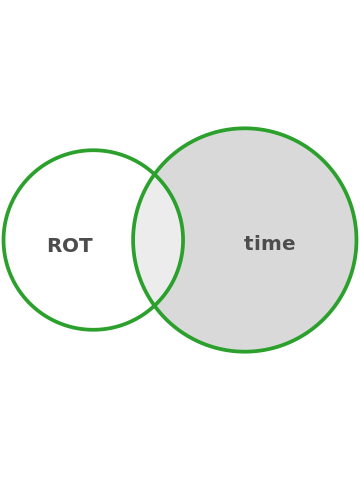

In [234]:
# DA
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv")
# head(leads)
DA = leads[leads$label %in% c("DA_D30","DA_D52","DA_ROT_D52"),]
DA_egenes = unique(DA$feature_id)

length(DA_egenes)
egenes <- c(egenes,length(DA_egenes))

egenes1 = int_DA[int_DA$q_value < 0.05,"feature_id"]
egenes2 = int_DA2[int_DA2$q_value < 0.05,"feature_id"]
egenes1 = egenes1[egenes1 %in% DA_egenes]
egenes2 = egenes2[egenes2 %in% DA_egenes]
length(egenes1)
length(egenes2)
length(egenes1[egenes1 %in% egenes2])

ROT = length(egenes1)
mat = length(egenes2)
inter = length(egenes1[egenes1 %in% egenes2])

egenes_ROT <- c(egenes_ROT,ROT)
egenes_mat <- c(egenes_mat,mat)

library(eulerr)
# fit <- euler(c(ROT = 92-13 , time = 155-13, "ROT&time" = 13)) ## all interactions
# plot(fit)
fit <- euler(c(ROT = ROT-inter , time = mat-inter, "ROT&time" = inter)) ## DA egenes only (FDR 5%)
plot(fit, 
     labels = list(col = c("gray30")),
     edges = list(col = col_DA, lex = 3)#,
#      fills = c("firebrick", "cornflowerblue")
    )

In [194]:
# library(dplyr)
library(ggplot2)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 2128

Warning message:
“Removed 3 rows containing missing values (geom_point).”

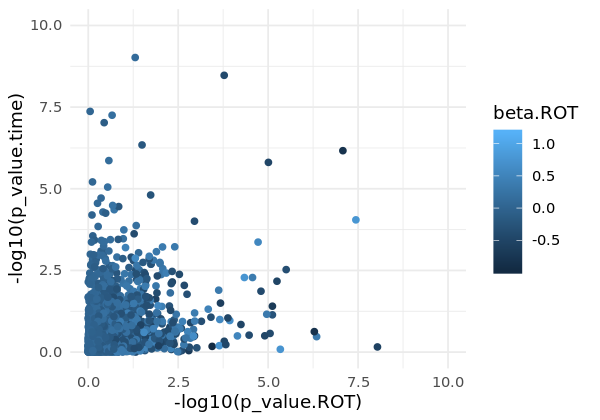

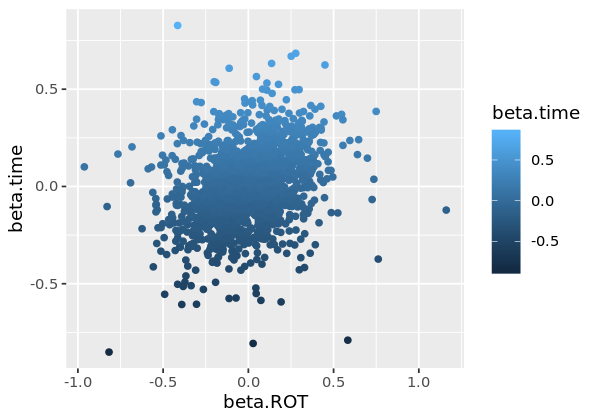

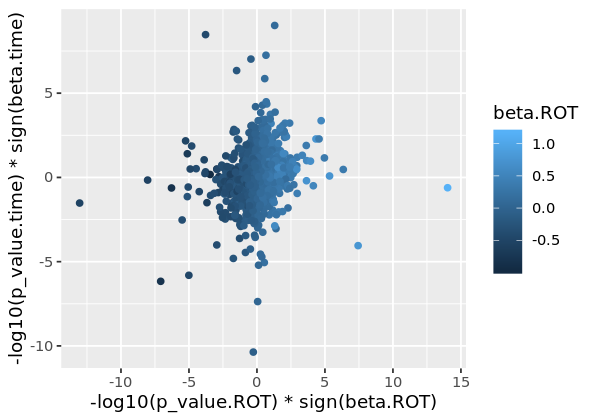

In [195]:
res = inner_join(int_DA,int_DA2,by = c("snp_id","feature_id"),suffix = c(".ROT",".time"))
nrow(res)
options(repr.plot.width = 5, repr.plot.height = 3.5)
ggplot(res, aes(x = -log10(p_value.ROT), y = -log10(p_value.time), col = beta.ROT)) + 
    geom_point() + xlim(c(0,10)) + ylim(c(0,10)) + theme_minimal()
ggplot(res, aes(x = beta.ROT, y = beta.time, col = beta.time)) + 
    geom_point() #+ xlim(c(0,10)) + ylim(c(0,10)) + theme_minimal()
ggplot(res, aes(x = -log10(p_value.ROT)*sign(beta.ROT), y = -log10(p_value.time)*sign(beta.time), col = beta.ROT)) + 
    geom_point() #+ xlim(c(0,10)) + ylim(c(0,10)) + theme_minimal()

In [196]:
cor(res$beta.ROT, res$beta.time)

[1] 0.3112933

In [197]:
res[-log10(res$p_value.ROT)*sign(res$beta.ROT) > 5,c("snp_id","feature_id")]

,snp_id,feature_id
,<chr>,<chr>
246,9_33010550_C_T,ENSG00000086061
299,9_108454343_A_G,ENSG00000095209
973,2_114222420_C_T,ENSG00000136682
1205,11_34905987_T_C,ENSG00000149089


In [198]:
res[-log10(res$p_value.ROT)*sign(res$beta.ROT) < -5,c("snp_id","feature_id")]

,snp_id,feature_id
,<chr>,<chr>
441,19_3879503_A_G,ENSG00000105278
549,12_121671970_C_G,ENSG00000110931
720,17_44344239_A_T,ENSG00000120071
1436,2_219083318_G_T,ENSG00000163466
1494,7_879157_G_C,ENSG00000164828
1591,3_57665807_C_T,ENSG00000168374
1867,14_105637130_C_T,ENSG00000183828
1869,2_20090677_G_A,ENSG00000183891
1984,12_56401085_G_A,ENSG00000197728


In [199]:
#### Sert

In [200]:
# Sert (ROT inter)
ROT_inter_Sert = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/treatment_D52/celltype_Sert/treatment_interaction_test_100cellfilter_top_qtl_results_all/top_qtl_results_all.txt"
int_Sert = read.csv(ROT_inter_Sert,sep="\t")
nrow(int_Sert)
int_Sert$q_value = p.adjust(int_Sert$p_value, "BH")
nrow(int_Sert[int_Sert$q_value < 0.05,])

[1] 3427

[1] 206

In [235]:
# Sert (maturation inter)
# day_inter_Sert = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/timepoint_D30_D52/input_files/celltype_Sert/top_qtl_results_all.txt"
day_inter_Sert = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/timepoint_D52_D30/input_files/celltype_Sert/top_qtl_results_all.txt"
int_Sert2 = read.csv(day_inter_Sert,sep="\t")
nrow(int_Sert2)
int_Sert2$q_value = p.adjust(int_Sert2$p_value, "BH")
nrow(int_Sert2[int_Sert2$q_value < 0.05,])

[1] 3400

[1] 248

In [236]:
# Sert
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv")
# head(leads)
Sert = leads[leads$label %in% c("Sert_D30","Sert_D52","Sert_ROT_D52"),]
Sert_egenes = unique(Sert$feature_id)
egenes <- c(egenes,length(Sert_egenes))

In [237]:
egenes1 = int_Sert[int_Sert$q_value < 0.05,"feature_id"]
egenes2 = int_Sert2[int_Sert2$q_value < 0.05,"feature_id"]
egenes1 = egenes1[egenes1 %in% Sert_egenes]
egenes2 = egenes2[egenes2 %in% Sert_egenes]
length(egenes1)
length(egenes2)
length(egenes1[egenes1 %in% egenes2])

[1] 153

[1] 190

[1] 47

In [238]:
ROT = length(egenes1)
mat = length(egenes2)
inter = length(egenes1[egenes1 %in% egenes2])

egenes_ROT <- c(egenes_ROT,ROT)
egenes_mat <- c(egenes_mat,mat)

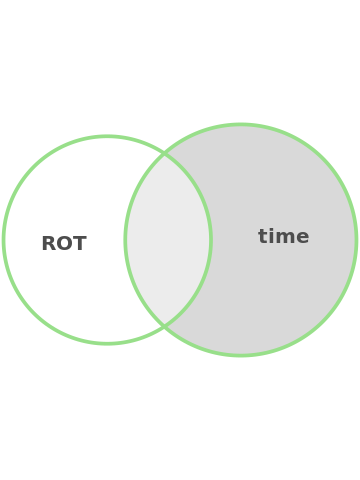

In [239]:
library(eulerr)
fit <- euler(c(ROT = ROT-inter , time = mat-inter, "ROT&time" = inter))
plot(fit, 
     labels = list(col = c("gray30")),
     edges = list(col = col_Sert, lex = 3))

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 2271

Warning message:
“Removed 1 rows containing missing values (geom_point).”

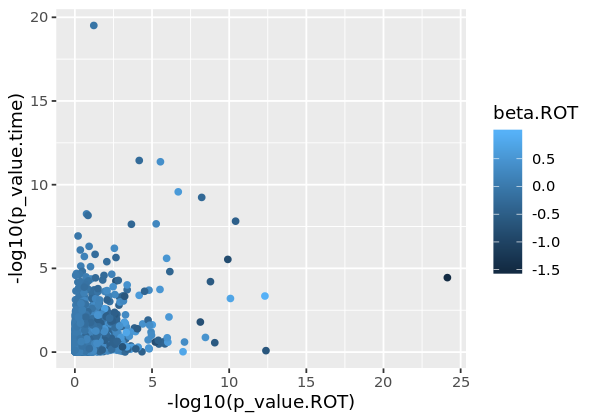

Warning message:
“Removed 1 rows containing missing values (geom_point).”

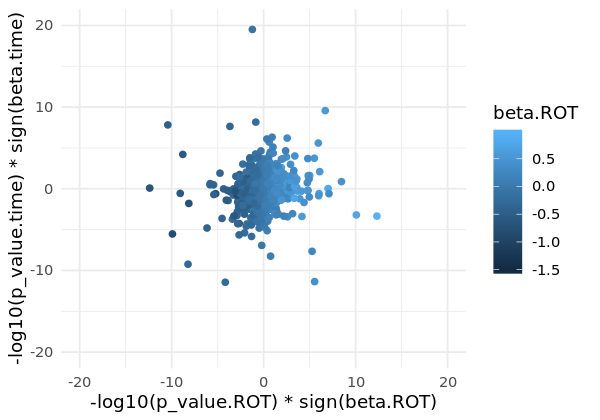

[1] 0.2654011

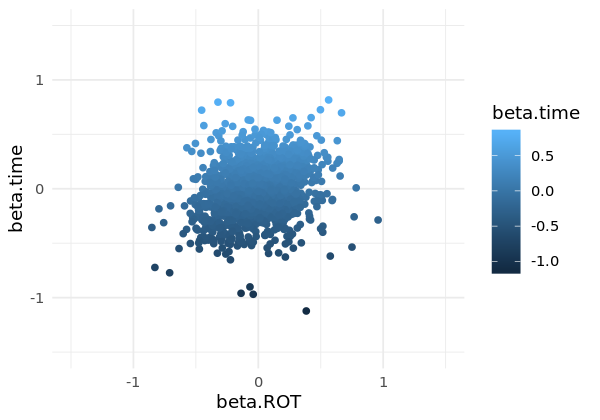

In [207]:
res = inner_join(int_Sert,int_Sert2,by = c("snp_id","feature_id"),suffix = c(".ROT",".time"))
nrow(res)
options(repr.plot.width = 5, repr.plot.height = 3.5)
ggplot(res, aes(x = -log10(p_value.ROT), y = -log10(p_value.time), col = beta.ROT)) + 
    geom_point()
ggplot(res, aes(x = -log10(p_value.ROT)*sign(beta.ROT), y = -log10(p_value.time)*sign(beta.time), col = beta.ROT)) + 
    geom_point() + xlim(c(-20,20)) + ylim(c(-20,20)) + theme_minimal()
ggplot(res, aes(x = beta.ROT, y = beta.time, col = beta.time)) + 
    geom_point() + xlim(c(-1.5,1.5)) + ylim(c(-1.5,1.5)) + theme_minimal()
cor(res$beta.ROT, res$beta.time)

In [208]:
cor(res$beta.ROT, res$beta.time)

[1] 0.2654011

In [209]:
### Epen1

In [240]:
# Epen1 (ROT inter)
ROT_inter_Epen1 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/treatment_D52/celltype_Epen1/treatment_interaction_test_100cellfilter_top_qtl_results_all/top_qtl_results_all.txt"
int_Epen1 = read.csv(ROT_inter_Epen1,sep="\t")
nrow(int_Epen1)
int_Epen1$q_value = p.adjust(int_Epen1$p_value, "BH")
nrow(int_Epen1[int_Epen1$q_value < 0.05,])

[1] 3442

[1] 132

In [241]:
# Epen1 (maturation inter)
# day_inter_Epen1 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/timepoint_D30_D52/input_files/celltype_Epen1/top_qtl_results_all.txt"
day_inter_Epen1 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/timepoint_D52_D30/input_files/celltype_Epen1/top_qtl_results_all.txt"
int_Epen1.2 = read.csv(day_inter_Epen1,sep="\t")
nrow(int_Epen1.2)
int_Epen1.2$q_value = p.adjust(int_Epen1.2$p_value, "BH")
nrow(int_Epen1.2[int_Epen1.2$q_value < 0.05,])

[1] 3432

[1] 123

[1] 102

[1] 90

[1] 15

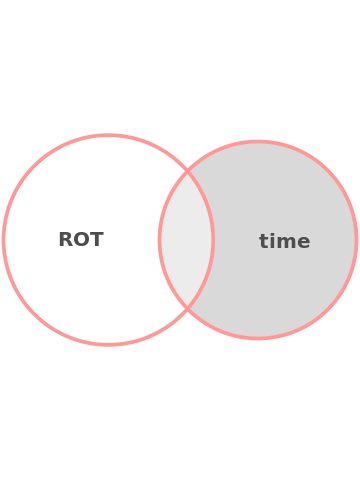

In [242]:
# Epen1
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv")
# head(leads)
Epen1 = leads[leads$label %in% c("Epen1_D30","Epen1_D52","Epen1_ROT_D52"),]
Epen1_egenes = unique(Epen1$feature_id)
egenes <- c(egenes, length(Epen1_egenes))

egenes1 = int_Epen1[int_Epen1$q_value < 0.05,"feature_id"]
egenes2 = int_Epen1.2[int_Epen1.2$q_value < 0.05,"feature_id"]
egenes1 = egenes1[egenes1 %in% Epen1_egenes]
egenes2 = egenes2[egenes2 %in% Epen1_egenes]
length(egenes1)
length(egenes2)
length(egenes1[egenes1 %in% egenes2])


ROT = length(egenes1)
mat = length(egenes2)
inter = length(egenes1[egenes1 %in% egenes2])

egenes_ROT <- c(egenes_ROT,ROT)
egenes_mat <- c(egenes_mat,mat)

library(eulerr)
fit <- euler(c(ROT = ROT-inter , time = mat-inter, "ROT&time" = inter))
plot(fit, 
     labels = list(col = c("gray30")),
     edges = list(col = col_Epen1, lex = 3))

In [213]:
132-16
123-16
16

[1] 116

[1] 107

[1] 16

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 2335

Warning message:
“Removed 10 rows containing missing values (geom_point).”

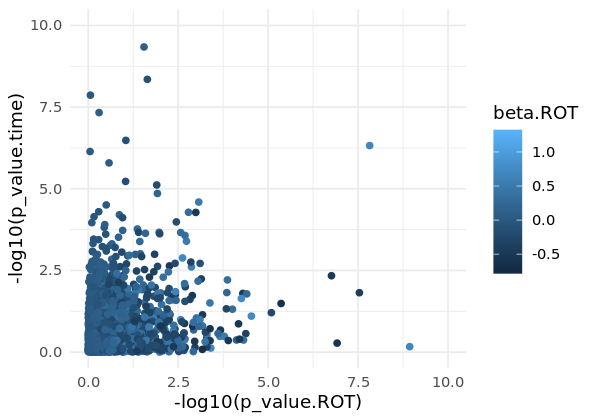

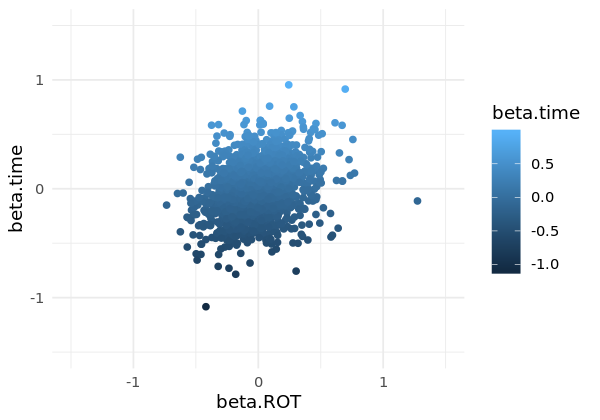

In [214]:
res = inner_join(int_Epen1,int_Epen1.2,by = c("snp_id","feature_id"),suffix = c(".ROT",".time"))
nrow(res)
options(repr.plot.width = 5, repr.plot.height = 3.5)
ggplot(res, aes(x = -log10(p_value.ROT), y = -log10(p_value.time), col = beta.ROT)) + 
    geom_point() + xlim(c(0,10)) + ylim(c(0,10)) + theme_minimal()
ggplot(res, aes(x = beta.ROT, y = beta.time, col = beta.time)) + 
    geom_point() + xlim(c(-1.5,1.5)) + ylim(c(-1.5,1.5)) + theme_minimal()

In [215]:
cor(res$beta.ROT, res$beta.time)

[1] 0.2942537

In [216]:
### Astro

In [243]:
# Astro (ROT inter)
ROT_inter_Astro = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/treatment_D52/celltype_Astro/treatment_interaction_test_100cellfilter_top_qtl_results_all/top_qtl_results_all.txt"
int_Astro = read.csv(ROT_inter_Astro,sep="\t")
nrow(int_Astro)
int_Astro$q_value = p.adjust(int_Astro$p_value, "BH")
nrow(int_Astro[int_Astro$q_value < 0.05,])

[1] 3372

[1] 42

In [244]:
# Astro (maturation inter)
# day_inter_Astro = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/timepoint_D30_D52/input_files/celltype_Astro/top_qtl_results_all.txt"
day_inter_Astro = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/timepoint_D52_D30/input_files/celltype_Astro/top_qtl_results_all.txt"
int_Astro2 = read.csv(day_inter_Astro,sep="\t")
nrow(int_Astro2)
int_Astro2$q_value = p.adjust(int_Astro2$p_value, "BH")
nrow(int_Astro2[int_Astro2$q_value < 0.05,])

[1] 3372

[1] 129

[1] 32

[1] 55

[1] 5

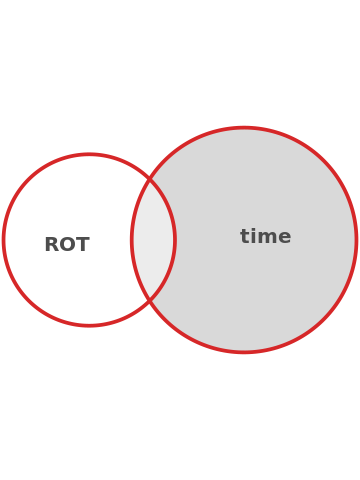

In [245]:
# Astro
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv")
# head(leads)
Astro = leads[leads$label %in% c("Astro_D30","Astro_D52","Astro_ROT_D52"),]
Astro_egenes = unique(Astro$feature_id)
egenes <- c(egenes,length(Astro_egenes))

egenes1 = int_Astro[int_Astro$q_value < 0.05,"feature_id"]
egenes2 = int_Astro2[int_Astro2$q_value < 0.05,"feature_id"]
egenes1 = egenes1[egenes1 %in% Astro_egenes]
egenes2 = egenes2[egenes2 %in% Astro_egenes]
length(egenes1)
length(egenes2)
length(egenes1[egenes1 %in% egenes2])

ROT = length(egenes1)
mat = length(egenes2)
inter = length(egenes1[egenes1 %in% egenes2])

egenes_ROT <- c(egenes_ROT,ROT)
egenes_mat <- c(egenes_mat,mat)

library(eulerr)
fit <- euler(c(ROT = ROT-inter , time = mat-inter, "ROT&time" = inter))
plot(fit, 
     labels = list(col = c("gray30")),
     edges = list(col = col_Astro, lex = 3))

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 2307

Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

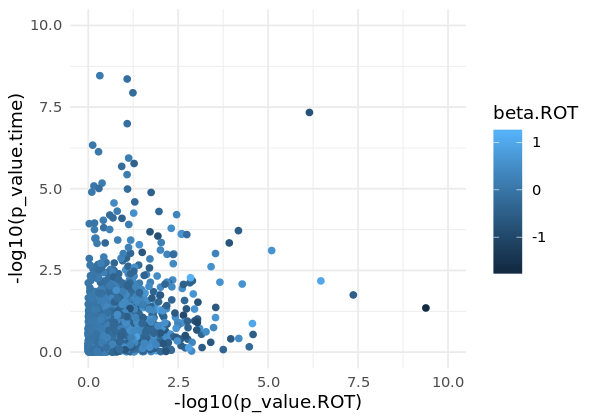

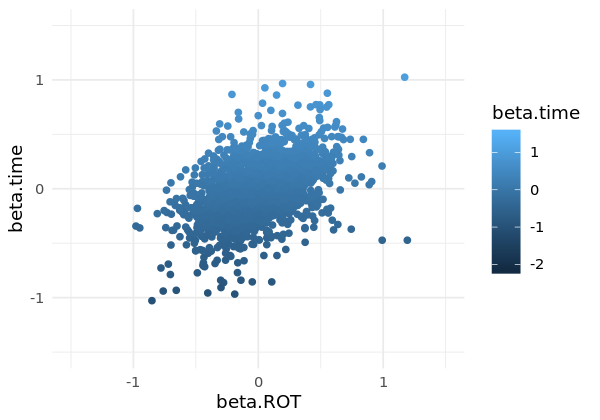

In [220]:
res = inner_join(int_Astro,int_Astro2,by = c("snp_id","feature_id"),suffix = c(".ROT",".time"))
nrow(res)
options(repr.plot.width = 5, repr.plot.height = 3.5)
ggplot(res, aes(x = -log10(p_value.ROT), y = -log10(p_value.time), col = beta.ROT)) + 
    geom_point() + xlim(c(0,10)) + ylim(c(0,10)) + theme_minimal()
ggplot(res, aes(x = beta.ROT, y = beta.time, col = beta.time)) + 
    geom_point() + xlim(c(-1.5,1.5)) + ylim(c(-1.5,1.5)) + theme_minimal()

In [221]:
cor(res$beta.ROT, res$beta.time)

[1] 0.452621

In [246]:
egenesDA = int_DA[int_DA$q_value < 0.05,"feature_id"]
egenesDA2 = int_DA2[int_DA2$q_value < 0.05,"feature_id"]
egenesSert = int_Sert[int_Sert$q_value < 0.05,"feature_id"]
egenesSert2 = int_Sert2[int_Sert2$q_value < 0.05,"feature_id"]
egenesEpen1 = int_Epen1[int_Epen1$q_value < 0.05,"feature_id"]
egenesEpen1.2 = int_Epen1.2[int_Epen1.2$q_value < 0.05,"feature_id"]
egenesAstro = int_Astro[int_Astro$q_value < 0.05,"feature_id"]
egenesAstro2 = int_Astro2[int_Astro2$q_value < 0.05,"feature_id"]
egenes1 = unique(c(egenesDA,egenesSert,egenesEpen1,egenesAstro))
egenes2 = unique(c(egenesDA2,egenesSert2,egenesEpen1.2,egenesAstro2))

In [247]:
head(egenes1)

[1]  29  64  65 112 113 209

In [248]:
ROT = length(egenes1)
mat = length(egenes2)
inter = length(egenes1[egenes1 %in% egenes2])

In [250]:
ROT
mat
inter

[1] 445

[1] 605

[1] 89

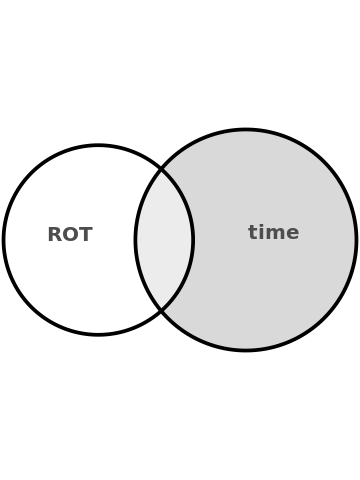

In [249]:
fit <- euler(c(ROT = ROT-inter , time = mat-inter, "ROT&time" = inter))
plot(fit, 
     labels = list(col = c("gray30")),
     edges = list(col = "black", lex = 3))

In [107]:
445-89
605-89
89

[1] 356

[1] 516

[1] 89

In [ ]:
ROT = 102-15 , time = 90-15, "ROT&time" = 15
ROT = 117-31 , time = 107-31, "ROT&time" = 31
ROT = 73-13 , time = 113-13, "ROT&time" = 13

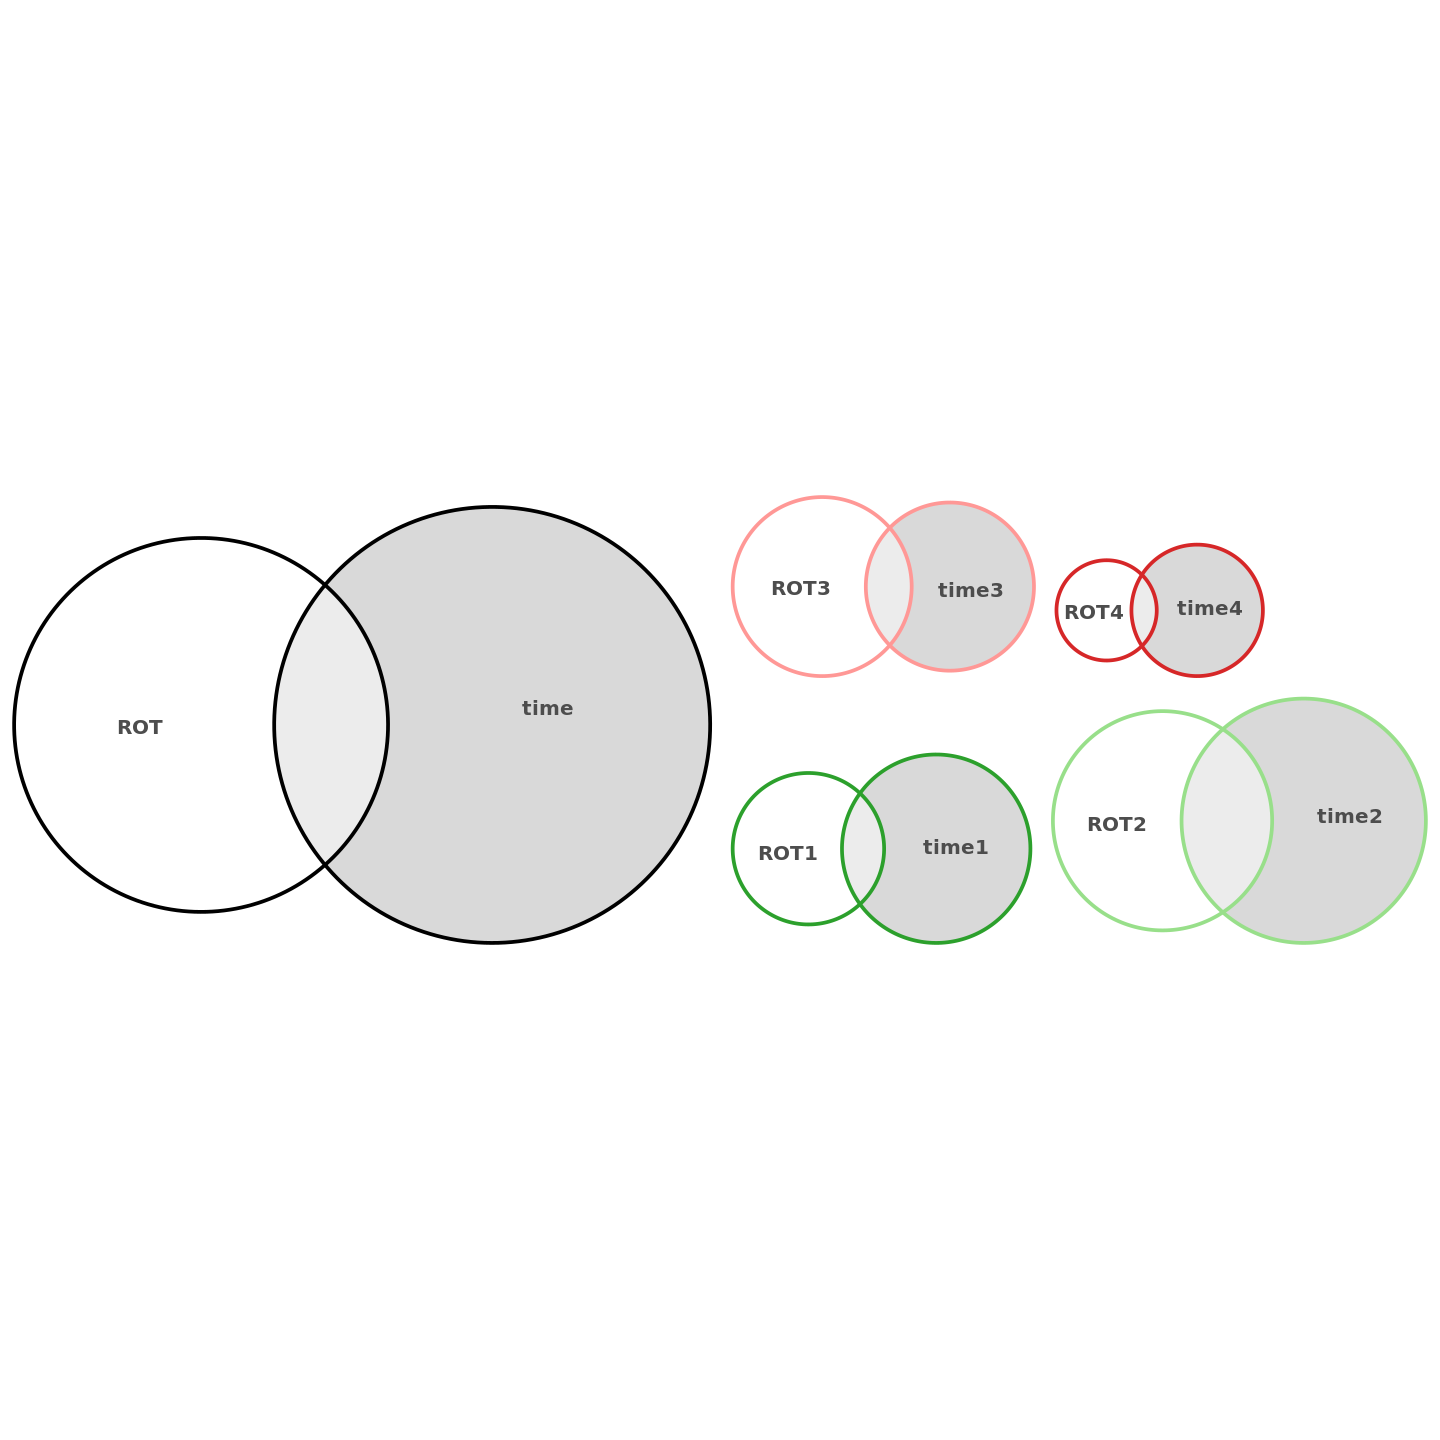

In [252]:
options(repr.plot.width = 12, repr.plot.height = 12)
fit <- euler(c(ROT = 445-89 , time = 605-89, "ROT&time" = 89,
               ROT1 = 73-13 , time1 = 113-13, "ROT1&time1" = 13,
               ROT2 = 153-47 , time2 = 190-47, "ROT2&time2" = 47,
               ROT3 = 102-15 , time3 = 90-15, "ROT3&time3" = 15,
               ROT4 = 32-5 , time4 = 55-5, "ROT4&time4" = 5))
plot(fit, 
     labels = list(col = c("gray30")),
     fills = list(fill = c("white","gray85",
                         "white","gray85",
                         "white","gray85",
                         "white","gray85",
                         "white","gray85")),
     edges = list(col = c("black","black",
                         col_DA,col_DA,
                         col_Sert,col_Sert,
                         col_Epen1,col_Epen1,
                         col_Astro,col_Astro), lex = 3))

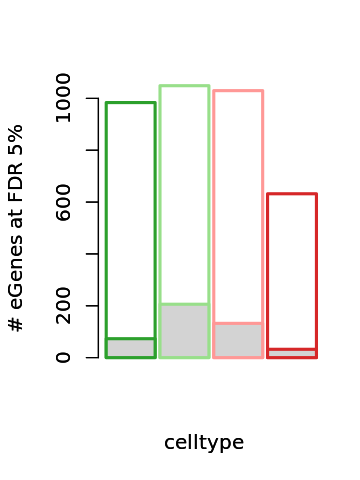

In [228]:
options(repr.plot.width = 3, repr.plot.height = 4)
my.xlim = c(0, 1000)
my.ylim = c(0,4)
my.space = c(0, 0.1, 0.1, 0.1)

opar <- par(lwd = 2.5)
barplot(egenes, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(egenes_ROT, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "lightgrey",
        border = c(col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space, add = T)


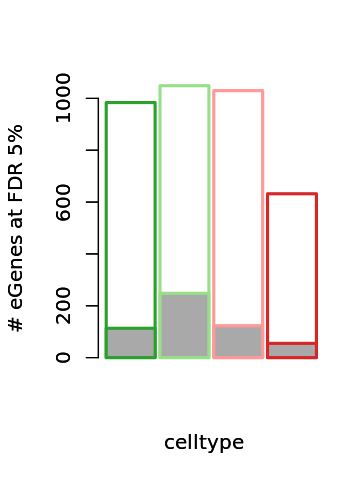

In [229]:
options(repr.plot.width = 3, repr.plot.height = 4)
my.xlim = c(0, 1000)
my.ylim = c(0,4)
my.space = c(0, 0.1, 0.1, 0.1)

opar <- par(lwd = 2.5)
barplot(egenes, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(egenes_mat, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "darkgrey",
        border = c(col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space, add = T)


In [230]:
egenes

[1]  984 1049 1030  632

In [289]:
unique_DA_egenes = DA_egenes[!(DA_egenes %in% unique(unlist(list(Sert_egenes,Epen1_egenes,Astro_egenes))))]
unique_Sert_egenes = Sert_egenes[!(Sert_egenes %in% unique(unlist(list(DA_egenes,Epen1_egenes,Astro_egenes))))]
unique_Epen1_egenes = Epen1_egenes[!(Epen1_egenes %in% unique(unlist(list(DA_egenes,Sert_egenes,Astro_egenes))))]
unique_Astro_egenes = Astro_egenes[!(Astro_egenes %in% unique(unlist(list(DA_egenes,Sert_egenes,Epen1_egenes))))]

unique_egenes <- c(length(unique_DA_egenes),length(unique_Sert_egenes),
                   length(unique_Epen1_egenes),length(unique_Astro_egenes))

In [290]:
unique_egenes_ROT <- c()
unique_egenes_mat <- c()

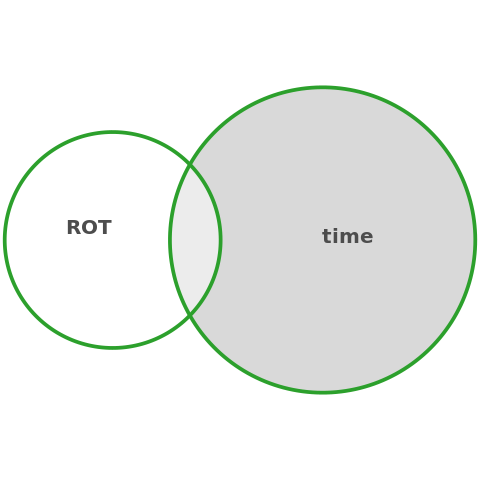

In [291]:
## DA
egenes1 = int_DA[int_DA$q_value < 0.05,"feature_id"]
egenes2 = int_DA2[int_DA2$q_value < 0.05,"feature_id"]
egenes1 = egenes1[egenes1 %in% unique_DA_egenes]
egenes2 = egenes2[egenes2 %in% unique_DA_egenes]

ROT = length(egenes1)
mat = length(egenes2)
inter = length(egenes1[egenes1 %in% egenes2])

unique_egenes_ROT <- c(unique_egenes_ROT,ROT)
unique_egenes_mat <- c(unique_egenes_mat,mat)

options(repr.plot.width = 4, repr.plot.height = 4)
fit <- euler(c(ROT = ROT-inter , time = mat-inter, "ROT&time" = inter)) ## DA egenes only (FDR 5%)
plot(fit, 
     labels = list(col = c("gray30")),
     edges = list(col = col_DA, lex = 3)   )

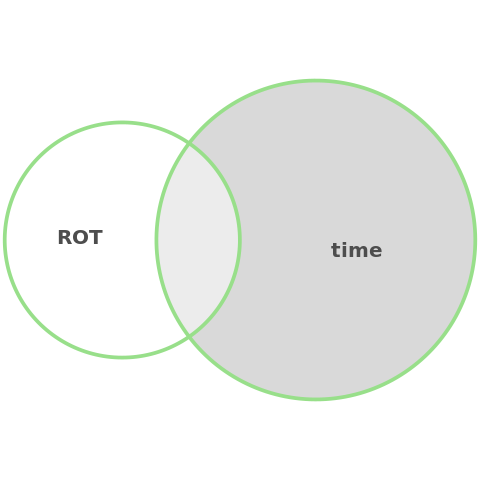

In [292]:
## Sert
egenes1 = int_Sert[int_Sert$q_value < 0.05,"feature_id"]
egenes2 = int_Sert2[int_Sert2$q_value < 0.05,"feature_id"]
egenes1 = egenes1[egenes1 %in% unique_Sert_egenes]
egenes2 = egenes2[egenes2 %in% unique_Sert_egenes]

ROT = length(egenes1)
mat = length(egenes2)
inter = length(egenes1[egenes1 %in% egenes2])

unique_egenes_ROT <- c(unique_egenes_ROT,ROT)
unique_egenes_mat <- c(unique_egenes_mat,mat)

fit <- euler(c(ROT = ROT-inter , time = mat-inter, "ROT&time" = inter)) ## DA egenes only (FDR 5%)
plot(fit, 
     labels = list(col = c("gray30")),
     edges = list(col = col_Sert, lex = 3)   )

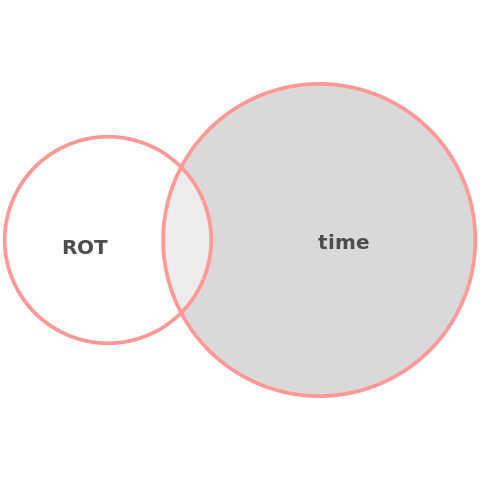

In [293]:
## Epen1
egenes1 = int_Epen1[int_Epen1$q_value < 0.05,"feature_id"]
egenes2 = int_Epen1.2[int_Epen1.2$q_value < 0.05,"feature_id"]
egenes1 = egenes1[egenes1 %in% unique_Epen1_egenes]
egenes2 = egenes2[egenes2 %in% unique_Epen1_egenes]

ROT = length(egenes1)
mat = length(egenes2)
inter = length(egenes1[egenes1 %in% egenes2])

unique_egenes_ROT <- c(unique_egenes_ROT,ROT)
unique_egenes_mat <- c(unique_egenes_mat,mat)

fit <- euler(c(ROT = ROT-inter , time = mat-inter, "ROT&time" = inter)) ## DA egenes only (FDR 5%)
plot(fit, 
     labels = list(col = c("gray30")),
     edges = list(col = col_Epen1, lex = 3)   )

[1] 0

[1] 5

[1] 0

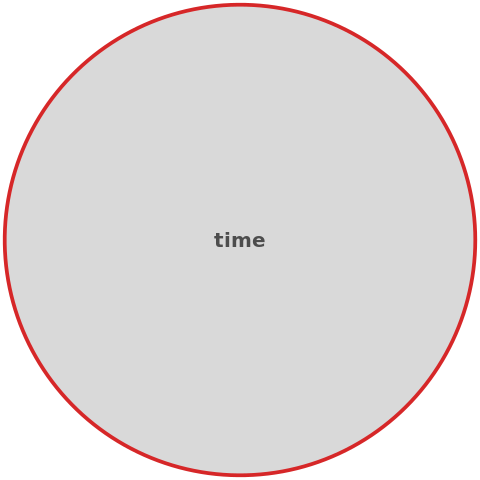

In [294]:
## Astro
egenes1 = int_Astro[int_Astro$q_value < 0.05,"feature_id"]
egenes2 = int_Astro2[int_Astro2$q_value < 0.05,"feature_id"]
egenes1 = egenes1[egenes1 %in% unique_Astro_egenes]
egenes2 = egenes2[egenes2 %in% unique_Astro_egenes]

ROT = length(egenes1)
mat = length(egenes2)
inter = length(egenes1[egenes1 %in% egenes2])

ROT
mat
inter

unique_egenes_ROT <- c(unique_egenes_ROT,ROT)
unique_egenes_mat <- c(unique_egenes_mat,mat)

fit <- euler(c(ROT = ROT-inter , time = mat-inter, "ROT&time" = inter)) ## Astro egenes only (FDR 5%)
plot(fit, 
     labels = list(col = c("gray30")),
     edges = list(col = col_Astro, lex = 3)   )

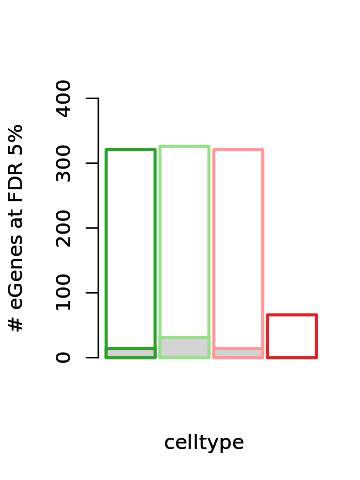

In [297]:
options(repr.plot.width = 3, repr.plot.height = 4)
my.xlim = c(0, 400)
my.ylim = c(0,4)
my.space = c(0, 0.1, 0.1, 0.1)

opar <- par(lwd = 2.5)
barplot(unique_egenes, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(unique_egenes_ROT, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "lightgrey",
        border = c(col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space, add = T)


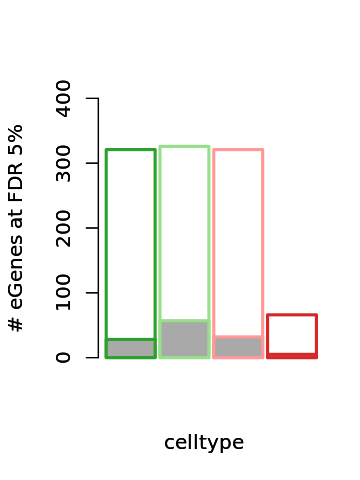

In [299]:
options(repr.plot.width = 3, repr.plot.height = 4)
my.xlim = c(0, 400)
my.ylim = c(0,4)
my.space = c(0, 0.1, 0.1, 0.1)

opar <- par(lwd = 2.5)
barplot(unique_egenes, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(unique_egenes_mat, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "darkgrey",
        border = c(col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space, add = T)
